# Regresyon 

## Polinom regresyon (polynomial regression)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_csv('data/temps.csv')

x_range = np.floor(np.arange(0,df1.shape[0])).reshape(348,1)
y_range = np.array(df1[['temp_1']]).reshape(348,1)

data3 = np.concatenate((x_range, y_range), axis=1)

plt.figure(figsize=(12,6))
plt.plot(data3[:,0], data3[:,1],'.')
plt.show()

<Figure size 1200x600 with 1 Axes>

## Polinom

Bir önceki dersimizin en son örneğinde olduğu gibi her veriye doğru oturtulamıyor olabilir. Başka bir deyişle altta yatan model doğrusal olmayan (*nonlinear*) bir model olabilir. Polinom modeli de benzeri bir modeldir. Dolayısıyla bundan sonraki bölümde verilere doğru yerine eğri oturtmaya çalışacağız.

Polinomlardan kastımız aşağıdaki gibi denklemler:

$ y = b_0 x^0+ b_1 x^1 + b_2 x^2 + b_3 x^3 \dots$

Daha genel yazacak olursak: 

$ y_i = \sum_{k=0}^{D} b_k x_i^k $

- Polinomlar doğru denkleminin daha genelleşmiş halidir. Doğru 1. dereceden bir polinomdur.
- Her yeni terim eğriye bir büküm daha sağlayacaktır.
- Eğitim (katsayıları bulmak) için hala en küçük kareler yöntemi kullanılabilir.

## Polinom derecesi (Hiper parametre en iyilemesi)

Çözüm aslında doğrusal regresyon çözümünden çok farklı değil. Önceki derste gördüğümüz üzere bir $X$ matrisi oluşturmamız gerekiyor. Bu sefer bu matrisin her bir sütunu polinomun ilgili katsayısını temsil edecek ve veriler ilgili sütunları kuvvetleri hesaplanarak yazılacak.

Aşağıdaki örnekte temel çok dereceli bir polinom regresyon problemi bulunuyor. Verilerin üzerindeki değişik derecedeki çözümleri izleyelim.

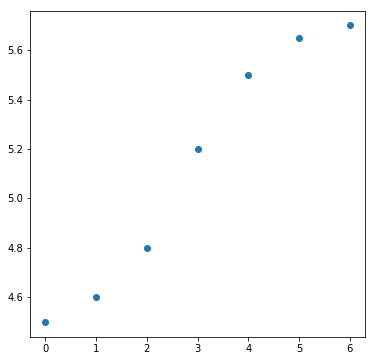

In [2]:
x = np.array([0,1,2,3,4,5,6])
y = np.array([4.5,4.6,4.8,5.2,5.5,5.65,5.7])

plt.figure(figsize=(6,6))
plt.plot(x,y,'o')
plt.show()

Çözümlere bakalım:

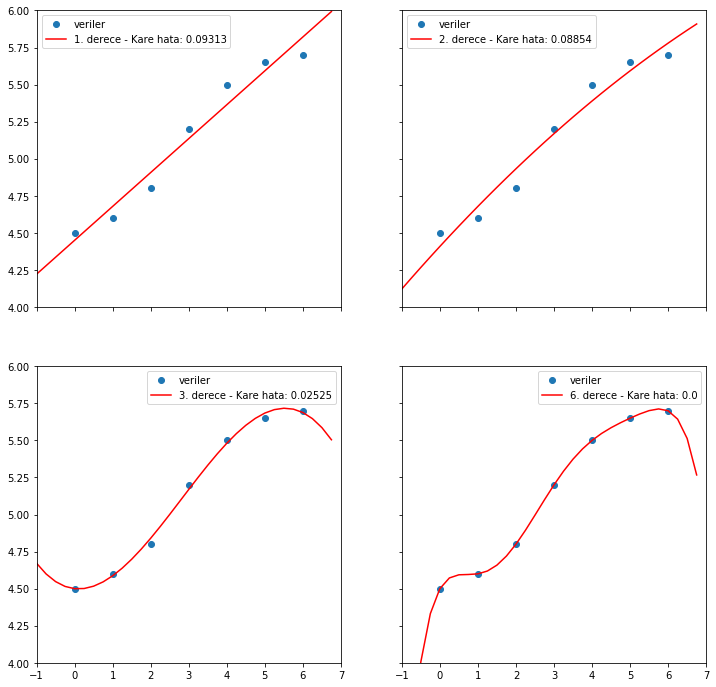

In [3]:
import matplotlib.pyplot as plt

# hatalar
squErr = np.zeros((3,1))

fig, ax = plt.subplots(2, 2, figsize=(12,12), sharex=True, sharey=True)
ax[0,0].set_ylim((4,6))
ax[0,0].set_xlim((-1,7))


# 1. derece
# X = np.concatenate((np.ones((x.shape[0],1)), x),axis=1)
# b = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)),X.T),y)
b = np.polynomial.polynomial.polyfit(x, y, 1)

squErr[0] = np.sqrt(np.sum(((b[0] + b[1] * x) - y)**2)/x.shape[0])

linex = np.arange(-1,7,.25)
liney = b[1]* linex + b[0]
ax[0,0].plot(x,y,'o')
ax[0,0].plot(linex,liney,c = 'r')
ax[0,0].legend(('veriler','1. derece - Kare hata: ' + str(np.round(squErr[0][0],5))))

# 2. derece
# X = np.concatenate((np.ones((x.shape[0],1)), x, x**2),axis=1)
b = np.polynomial.polynomial.polyfit(x, y, 2)

squErr[1] = np.sqrt(np.sum(((b[0] + b[1] * x + b[2] * x**2) - y)**2)/x.shape[0])

linex = np.arange(-1,7,.25)
liney = b[2] * linex**2 + b[1]* linex + b[0]
ax[0,1].plot(x,y,'o')
ax[0,1].plot(linex,liney,c = 'r')
ax[0,1].legend(('veriler','2. derece - Kare hata: ' + str(np.round(squErr[1][0],5))))

# 3. derece
# X = np.concatenate((np.ones((x.shape[0],1)), x, x**2, x**3),axis=1)
# b = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)),X.T),y)
b = np.polynomial.polynomial.polyfit(x, y, 3)

squErr[2] = np.sqrt(np.sum(((b[0] + b[1] * x + b[2] * x**2 + b[3] * x**3) - y)**2)/x.shape[0])

linex = np.arange(-1,7,.25)
liney = b[3] * linex ** 3 + b[2] * linex**2 + b[1]* linex + b[0]
ax[1,0].plot(x,y,'o')
ax[1,0].plot(linex,liney,c = 'r')
ax[1,0].legend(('veriler','3. derece - Kare hata: ' + str(np.round(squErr[2][0],5))))

# 6. derece
# X = np.concatenate((np.ones((x.shape[0],1)), x, x**2, x**3, x**4, x**5, x**6),axis=1)
b = np.polynomial.polynomial.polyfit(x, y, 6)

squErr[2] = np.sqrt(np.sum(((b[0] + b[1] * x + b[2] * x**2 + b[3] * x**3 + b[4] * x**4 + b[5] * x**5 + b[6] * x**6) - y)**2)/x.shape[0])

linex = np.arange(-1,7,.25)
liney = b[6] * linex**6 + b[5] * linex**5 + b[4] * linex**4 + b[3] * linex ** 3 + b[2] * linex**2 + b[1]* linex + b[0]
ax[1,1].plot(x,y,'o')
ax[1,1].plot(linex,liney,c = 'r')
ax[1,1].legend(('veriler','6. derece - Kare hata: ' + str(np.round(squErr[2][0],5))))

plt.show()

Özetle:

- **Polinomun derecesi**ni ne kadar artırırsak **hata**yı o kadar **düşürür**üz.
- **Veri sayısı kadar** artırabilirsek, **hata sıfır**a yaklaşacaktır.
- Ancak, bu duruma verileri ezberlemek veya aşırı öğrenme, **overlearning veya overfitting** deniyor.
- Amaç hatayı düşürmekten çok mümkün olan **en genel modelin parametrelerini**, bu durumda en uygun dereceyi bulmak.
- Henüz **görülmemiş veriler** için de hatanın düşük olmasını sağlamak gerekiyor.

## Polinom derecesine karar verme

### Veri üretme (sentezleme)

Basit bir örnek için veri üretelim. Verilerin nasıl üretildiğini bildiğimiz için çözümü görmek daha rahat olacaktır. Ama genellikle verilerin nasıl bir alt yapıya oturacağına bu kadar kolay karar veremeyiz.

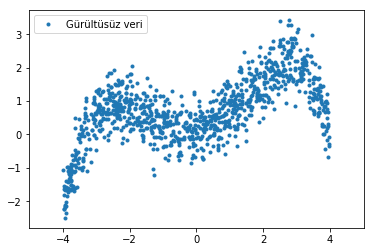

In [4]:
# Bulunması beklenen parametreler
b = [.1, .2, .4, .005, -.03]
inData = np.random.rand(1000) * 8 -4
polynomial = b[4]*(inData**4) \
        + b[3]*(inData**3) \
        + b[2]*(inData**2) \
        + b[1]*(inData**1) \
        + b[0]
        
outData = polynomial + np.random.normal(0,.5,1000)

data1 = np.concatenate((inData.reshape(1000,1),outData.reshape(1000,1)),axis=1)

# plt.plot(inData, polynomial, '.c')
plt.plot(inData, outData,'.')
#plt.plot(linex, liney, 'c-')
plt.legend(['Gürültüsüz veri', 'Gürültülü veri'])
plt.axis('equal')
plt.show()

In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
import numpy as np

def func(b4,b3,b2,b1,b0):
    plt.figure(figsize=(6,6))
    plt.plot(data1[:,0], data1[:,1],linewidth = 0,marker=".",markersize=8)
    
    plt.ylim(-4,4)
    plt.xlim(-5,5)
    linex = np.arange(-5,5,.25)
    liney = b4 * linex **4 + b3 * linex**3 + b2 * linex**2 + b1* linex + b0
    
    absErr = 0
    squErr = 0
    for i in range(data1.shape[0]):
        x_ori = data1[i,0]
        y_ori = data1[i,1]
        y_hat = b4 * x_ori **4 + b3 * x_ori**3 + b2 * x_ori**2 + b1* x_ori + b0
        absErr += np.abs(y_hat - y_ori)
        squErr += (y_hat - y_ori)**2
    absErr = absErr / data1.shape[0]
    squErr = np.sqrt(squErr) / data1.shape[0]
    plt.plot(linex,liney,c = 'r',linewidth=3)
    plt.grid(True,axis='both')
    plt.show()
    print("Absolute Error: ",absErr)
    print("Squared Error: ",squErr)
    return True

ret=interactive(func,b4 = (-.5,.5,.01), b3= (-.5,.5,.05), b2 = (-.5,.5,.05), b1= (-.5,.5,.05),b0 = (-.5,.5,.05))
              
display(ret)

interactive(children=(FloatSlider(value=0.0, description='b4', max=0.5, min=-0.5, step=0.01), FloatSlider(valu…

## Residual Analizi

Çıkan sonucumuzu ekrana çizdirelim ve toplam hataya bakalım. Daha sonra benzeri şekilde kullanacağımız için bunu bir fonksiyona dönüştürebiliriz. Hatta regresyon eğrisini bulma, hata hesaplama ve ekrana bastırma için ayrıca fonksiyonlar yazarsak işlerimizi kolaylaştırırız.

In [6]:
def r_squared(data, b):

    # Toplam kareler toplamı
    TSS = np.sum((data[:,1] - np.mean(data[:,1]))**2)

    y_hat = np.zeros(data[:,0].shape)

    for i in range(data.shape[0]):
        for j in range(len(b)):
            y_hat[i] += b[j] * data[i,0]**j

    # Residual kareler toplamı
    RSS = np.sum((data[:,1] - y_hat)**2)

    R2 = (TSS - RSS)/TSS
    return round(R2,4)

def pr_error(data, b):
    # calculate error
    squErr = 0
    y_hat = np.zeros(data[:,0].shape)

    for i in range(data.shape[0]):
        x_ori = data[i,0]
        y_ori = data[i,1]
        for j in range(len(b)):
            y_hat[i] += b[j] * x_ori**j
    squErr = np.sqrt(np.sum(np.square(y_hat - data[:,1])))/data.shape[0]
    return round(squErr,6)


def func(pow = 0):
    b = np.polynomial.polynomial.polyfit(data1[:,0], data1[:,1], pow)

    fig, axes = plt.subplots(1, 2, figsize=(12,6))
    ## plotting the fitted curve
    # set limits
    axes[0].set_ylim((-4,4))
    axes[0].set_xlim((-5,5))

    # show data
    axes[0].plot(data1[:,0], data1[:,1],linewidth = 0,marker=".",markersize=8)
    linex = np.arange(-5,5,.001)
    liney = np.zeros(linex.shape)

    ffit = np.polynomial.polynomial.Polynomial(b)
    liney = ffit(linex)

    axes[0].plot(linex,liney,c = 'r',linewidth=4)
    axes[0].grid(True)
    axes[0].set_title('PolyFit - R_sq: ' + str(r_squared(data1,b)), fontsize=16)

    ## plot residuals
    axes[1].set_xlim((-5,5))
    axes[1].set_ylim((-4,4))
    y_hat = np.zeros(data1[:,0].shape)

    for i in range(data1.shape[0]):
        x_ori = data1[i,0]
        y_ori = data1[i,1]
        for j in range(len(b)):
            y_hat[i] += b[j] * x_ori**j

    for i in range(data1.shape[0]):
        axes[1].plot([data1[i,0],data1[i,0]],[0, data1[i,1]-y_hat[i]],'c','-', linewidth=3)

    axes[1].plot([-5,5],[0,0],'r')
    axes[1].plot(data1[:,0],data1[:,1]-y_hat,'.')
    axes[1].grid(True, which='both')
    axes[1].set_title('Residuals - SqError: ' + str(pr_error(data1,b)), fontsize=16)
    
    fig.suptitle('Degree: ' + str(pow), fontsize=16)
    print(b)

    plt.show()

ret=interactive(func, pow = (0,25,1))
              
display(ret)

# b = [.1, .2, .4, .005, -.03]

interactive(children=(IntSlider(value=0, description='pow', max=25), Output()), _dom_classes=('widget-interact…

## Doğrulama (Validation)

Görüldüğü üzere çözüm polinomunun boyutu arttıkça hata azalıyor ve verileri tanımlamada daha başarılı oluyor. Ancak, bu durum genelleştirilemez bir durumdur ve yapay öğrenmede **veriyi ezberleme** (*overfitting, overlearning*) diye tanımlanır. Bunu engellemek için yapılması gereken eğitilmemiş verilerin nasıl tahminlendiğini izlemektir.

- Denetimli öğrenmenin en çok başvurduğu yöntemdir.
- Aranan model parametrelerinin eğitimde kullanılmamış veriler sayesinde bulunması sağlanır.
- Veriler homojenliği koruyacak şekilde iki kümeye ayrılır: 
- Eğitim (training) kümesi ve doğrulama (validation) kümesi 
- Eğitim kümesi ile verilere göre model parametreleri aranır.
- Doğrulama kümesindeki hatayı en düşük yapan model parametreleri seçilir.

Dolayısıyla verilerimizi eğitim (*training*) ve doğrulama (*validation*) olarak ikiye böleceğiz ve polinom boyutunu **alt-parametre** (*hyper-parameter*) olarak kullanacağız. Alt-parametreler genellikle $\theta$ ile gösterilir.

$E(B, \theta) = \sum_{i=0}^{N} (y_i - \sum_{k=0}^{D \in \theta} b_k x_i^k)$

Önce verilerimizi ikiye bölmekle başlayalım. Zaten rastgele bir dağılım olduğu için tam ortadan ikiye bölebiliriz.

In [7]:
print(data1)

[[ 3.14514358  1.91256835]
 [-0.67414361  0.6798736 ]
 [ 2.76102589  2.39916427]
 ...
 [ 1.21118083  0.88311305]
 [-2.27156031  0.68686839]
 [-0.07748263  1.25720751]]


In [8]:
data1_tra = data1[:500,:]
data1_val = data1[500:,:]


def func(pow=0):
    y_hat = np.zeros(data1_tra.shape)

    b = np.polynomial.polynomial.polyfit(data1_tra[:,0], data1_tra[:,1], pow)

    for i in range(data1_tra.shape[0]):
        x_ori = data1_tra[i,0]
        y_ori = data1_tra[i,1]
        for j in range(len(b)):
            y_hat[i] += b[j] * x_ori**j

    fig, axes = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)

    linex = np.arange(-5,5,.001)
    liney = np.zeros(linex.shape)
    ffit = np.polynomial.polynomial.Polynomial(b)
    liney = ffit(linex)

    axes[0].plot(data1_tra[:,0],data1_tra[:,1],linewidth = 0,marker=".",markersize=8)
    axes[0].plot(linex,liney,c = 'r',linewidth=3)

    axes[0].set_title("Training Error: " + str(pr_error(data1_tra, b)), fontsize=16)
    
    axes[0].set_ylim(-4,4)
    axes[0].set_ylim(-4,4)
    axes[0].grid(True)

    
    axes[1].plot(data1_val[:,0],data1_val[:,1],linewidth = 0,marker=".",markersize=8, c = 'orange')
    axes[1].plot(linex,liney,c = 'r',linewidth=3)
    axes[1].set_title("Validation Error: " + str(pr_error(data1_val, b)), fontsize=16)

    axes[1].set_xlim(-5,5)
    axes[1].set_xlim(-5,5)
    axes[1].grid(True)
    # axes[0].legend(('Training data','Validation data'))
    
    fig.suptitle('Degree: ' + str(pow), fontsize=16)

    plt.show()
    print(b.T)

ret=interactive(func, pow = (0,20,1))
              
display(ret)

interactive(children=(IntSlider(value=0, description='pow', max=20), Output()), _dom_classes=('widget-interact…

Bundan sonraki aşamada eğitimi sadece eğitim kümesinde yapıp, hatayı iki veri kümesinde de izleyeceğiz, ancak doğrulama kümesindeki hata bizim için daha değerli olacaktır.

0 ile 20 arasındaki boyutlar için hataları hesaplayalım.

/usr/lib64/python3.5/site-packages/ipykernel_launcher.py:6: RankWarning: The fit may be poorly conditioned
  


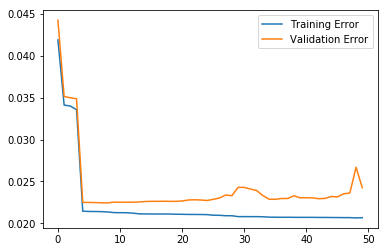

In [9]:
degree = range(50)
tra_errors = np.zeros(len(degree))
val_errors = np.zeros(len(degree))

for i in degree:
    b = np.polynomial.polynomial.polyfit(data1_tra[:,0], data1_tra[:,1], i)
    tra_errors[i] = pr_error(data1_tra, b)
    val_errors[i] = pr_error(data1_val, b)
    
    tra_err = pr_error(data1_tra,b)
    val_err = pr_error(data1_val,b)

    
plt.plot(tra_errors)
plt.plot(val_errors)
plt.legend(('Training Error','Validation Error'))
plt.show()

## Bias (yanlılık) - Variance (çeşitlilik) Polemiği

![http://scott.fortmann-roe.com/docs/BiasVariance.html](http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png)    

Genellikle en çok veriyi açıklayan en az karmaşıklık tercih edilir. Niye? 

- Modelin karmaşıklığı arttıkça bütün verilerdeki çeşitliliği öğrenir, ama bu çeşitlilik yanıltıcı olabilir.
- Yanlılık (bias) daha çok veriyi açıklamak ile ilişkilidir, model karmaşıklığı arttıkça bu sadece eğitim verilerine doğru bir yanlılık oluşmaya başlar, genel yanlılık düşer. 
- Bu iki parametrenin en uygun olduğu nokta veri karmaşıklığının seçilmesi gereken noktasıdır.
- Amaç, veri kümesinin en genel halinde de hatayı en düşük yapacak model parametrelerini (hyper parameters) bulmak.
- Genel yönelime göre, model karmaşıklaştıkça eğitim verileri (bias = yanlılık) hatası devamlı olarak düşer, doğrulama verileri (variance = çeşitlilik) hatası önce düşer, bir noktadan sonra da artmaya başlar.
- Doğrulama hatasını bu en düşük noktaya getiren parametre (karmaşıklık derecesi) söz konusu verilere en uygun model parametresidir.

- Regularization (düzenlileştirme) verileri açıklamada çok önemlidir!

## Gerçek veri örneği 1

Öncelikle bizi polinom regresyona iten sıcaklık verilerine uygulamaya çalışalım. Önce verilerimizi ikiye bölmemiz gerekiyor. Ancak veriler zaman verisi olduğundan sıralı olacaklardır. Çeşitliliği sağlamak için verileri aralarında karıştırmamız gerekiyor.

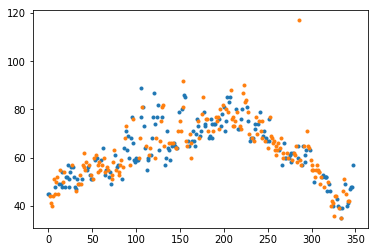

In [10]:
df3 = pd.read_csv('data/temps.csv')

x_range = np.floor(np.arange(0,df3.shape[0])).reshape(348,1)
y_range = np.array(df3[['temp_1']]).reshape(348,1)

data3 = np.concatenate((x_range, y_range), axis=1)

set_size_tra = 1* data3.shape[0]//2

new_order = np.random.permutation(data3.shape[0])
data3_tra = data3[new_order][:set_size_tra,:]
data3_val = data3[new_order][set_size_tra:,:]

plt.plot(data3_tra[:,0], data3_tra[:,1],'.')
plt.plot(data3_val[:,0], data3_val[:,1],'.')
plt.show()

/usr/lib64/python3.5/site-packages/ipykernel_launcher.py:6: RankWarning: The fit may be poorly conditioned
  


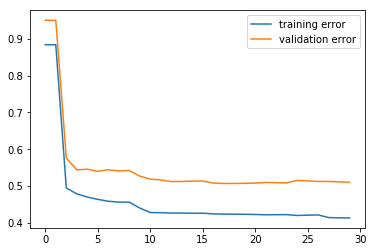

In [11]:
powers = range(30)
tra_errors = np.zeros(len(powers))
val_errors = np.zeros(len(powers))

for i in powers:
    b = np.polynomial.polynomial.polyfit(data3_tra[:,0], data3_tra[:,1], i)
    tra_errors[i] = pr_error(data3_tra, b)
    val_errors[i] = pr_error(data3_val, b)
    
plt.plot(tra_errors)
plt.plot(val_errors)
plt.legend(['training error', 'validation error'])
plt.show()

In [12]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

xlimits = (-50,400)
ylimits = (0,120)
def func(power=0):
    fig, axes = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)

    axes[0].plot(data3_tra[:,0], data3_tra[:,1],linewidth = 0,marker=".",markersize=8)
    axes[1].plot(data3_val[:,0], data3_val[:,1],linewidth = 0,marker=".",markersize=8,color='orange')
    
    linex = np.arange(-50,400,.01)
    liney = np.zeros(linex.shape)
    
    axes[0].set_ylim(ylimits)
    axes[0].set_xlim(xlimits)
    axes[1].set_ylim(ylimits)
    axes[1].set_xlim(xlimits)

    b = np.polynomial.polynomial.polyfit(data3_tra[:,0], data3_tra[:,1], power)
    ffit = np.polynomial.polynomial.Polynomial(b)
    liney = ffit(linex)

    tra_err = pr_error(data3_tra,b)
    val_err = pr_error(data3_val,b)
    
    axes[0].plot(linex,liney,c = 'r',linewidth=3)
    axes[0].set_title("Training Error: %s" % round(tra_err,4))
    axes[1].plot(linex,liney,c = 'r',linewidth=3)
    axes[1].set_title("Validation Error: %s" % round(val_err,4))

    axes[0].grid(True,axis='both')
    axes[1].grid(True,axis='both')
    plt.show()
    print(b.T)

    return True

ret=interactive(func,power=(0,20))
              
display(ret)

interactive(children=(IntSlider(value=0, description='power', max=20), Output()), _dom_classes=('widget-intera…

## Gerçek veri örneği 2

Daha uzun senelerin sıcaklık verilerini üzerinde böyle bir çalışma yapabiliyor muyuz diye inceleyeceğiz. Sıcaklık verileri zamana bağlı veriler olduğu ve genel bir model oturtmak istediğimiz için verileri önce kendi aralarında karıştırmalı, daha sonra kümelere ayırmamız gerekiyor.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df4 = pd.read_csv('data/daily-min-temperatures.csv')
df4.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


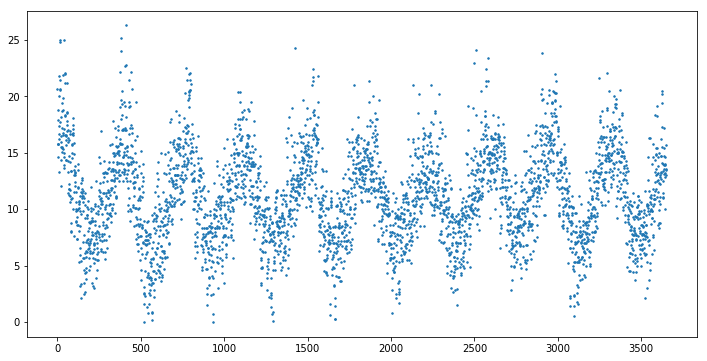

In [15]:
plt.figure(figsize=(12,6))
rowCount = df4.shape[0]
x_range = np.floor(np.arange(0,rowCount)).reshape(rowCount,1)
y_range = np.array(df4[['Temp']]).reshape(rowCount,1)

data4 = np.concatenate((x_range.reshape(rowCount,1),y_range.reshape(rowCount,1)),axis=1)

plt.plot(x_range, y_range,'.',markersize=3)
# plt.xticks(df4['Date'])
plt.show()

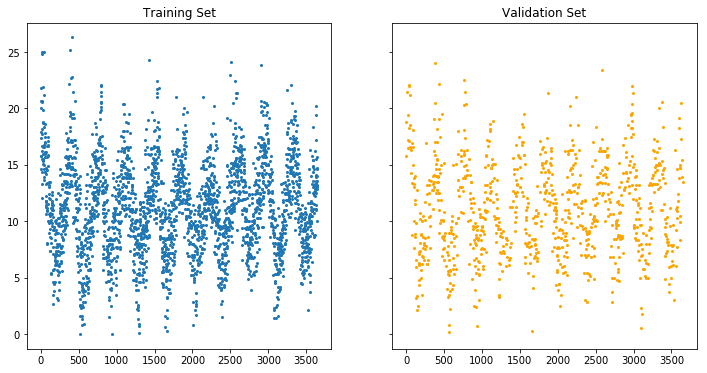

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)

new_order = np.random.permutation(data4.shape[0])
set_size_tra = 3*data4.shape[0]//4
data4_tra = data4[new_order][:set_size_tra,:]
data4_val = data4[new_order][set_size_tra:,:]

axes[0].plot(data4_tra[:,0], data4_tra[:,1],'o', markersize=2)
axes[0].set_title("Training Set")
axes[1].plot(data4_val[:,0], data4_val[:,1],'o',color='orange', markersize=2)
axes[1].set_title("Validation Set")
plt.show()

In [24]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

xlimits = (-200,4000)
ylimits = (0,30)
def func(power=0):
    fig, axes = plt.subplots(2, 1, figsize=(12,6), sharex=True, sharey=True)

    axes[0].plot(data4_tra[:,0], data4_tra[:,1],linewidth = 0,marker=".",markersize=8)
    axes[1].plot(data4_val[:,0], data4_val[:,1],linewidth = 0,marker=".",markersize=8,color='orange')
    
    linex = np.arange(xlimits[0],xlimits[1],1)
    liney = np.zeros(linex.shape)
    
    axes[0].set_ylim(ylimits)
    axes[0].set_xlim(xlimits)
    axes[1].set_ylim(ylimits)
    axes[1].set_xlim(xlimits)

    b = np.polynomial.polynomial.polyfit(data4_tra[:,0], data4_tra[:,1], power)
    tra_err = pr_error(data4_tra,b)
    val_err = pr_error(data4_val,b)
    ffit = np.polynomial.polynomial.Polynomial(b)
    liney = ffit(linex)

    axes[0].plot(linex,liney,c = 'r',linewidth=3)
    axes[0].set_title("Training Error: %s" % np.round(tra_err,4))
    axes[1].plot(linex,liney,c = 'r',linewidth=3)
    axes[1].set_title("Validation Error: %s" % np.round(val_err,4))

    axes[0].grid(True,axis='both')
    axes[1].grid(True,axis='both')
    plt.show()
    print(b.T)

    return True

ret=interactive(func,power=(0,50))
              
display(ret)

interactive(children=(IntSlider(value=0, description='power', max=50), Output()), _dom_classes=('widget-intera…

/usr/lib64/python3.5/site-packages/ipykernel_launcher.py:6: RankWarning: The fit may be poorly conditioned
  
/home/serhan/.local/lib64/python3.5/site-packages/numpy/polynomial/polynomial.py:1485: RuntimeWarning: overflow encountered in square
  scl = np.sqrt(np.square(lhs).sum(1))
/home/serhan/.local/lib64/python3.5/site-packages/numpy/core/_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


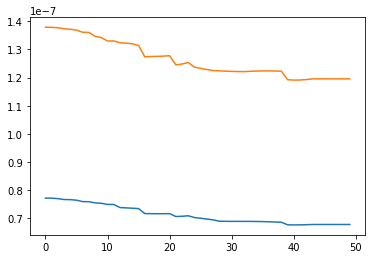

In [18]:
powers = range(50)
tra_errors = np.zeros(len(powers))
val_errors = np.zeros(len(powers))

for i in powers:
    b = np.polynomial.polynomial.polyfit(data4_tra[:,0], data4_tra[:,1], i)
    tra_errors[i] = pr_error(data4_tra, b)/1000000
    val_errors[i] = pr_error(data4_val, b)/1000000
    
plt.plot(tra_errors)
plt.plot(val_errors)
plt.show()

## Periyodik fonksiyon regresyonu?

Aranılan parametreler çarpımların toplamı şeklinde ise *En küçük kareler* yöntemi uygulanmaya devam edebilir, ancak iki parametre çarpım durumuna geçerse çözüm için kullanılamaz.

$ y = b_0 + b_1 x + b_2 \sin(\omega x + z)$

[1.095e+01 1.313e-04 3.186e+00]


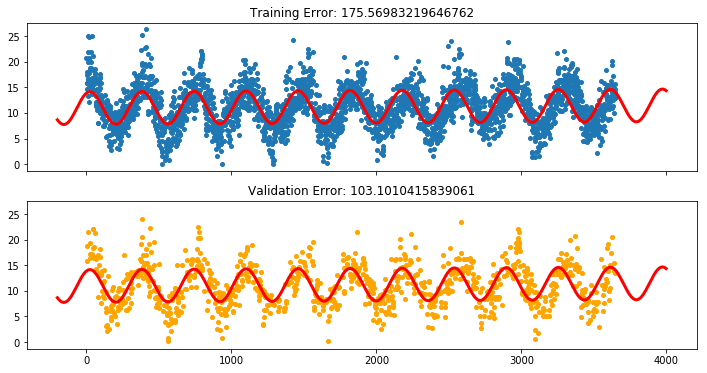

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(12,6), sharex=True, sharey=True)

w = 0.0175
z = 20

X = np.concatenate(
    (np.ones((data4_tra[:,0].shape[0],1)),
     data4_tra[:,0].reshape(data4_tra.shape[0],1),
     np.sin(data4_tra[:,0] * w).reshape(data4_tra.shape[0],1)),axis=1)
y = data4_tra[:,1]
np.set_printoptions(precision=3)
b = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)),X.T),y)

print(b)

linex = np.arange(xlimits[0],xlimits[1],1)
liney = b[0] + b[1] * linex + b[2] * np.sin(linex * w + z)

tra_err = np.sqrt(np.sum((b[0] + b[1] * data4_tra[:,0] + b[2] * np.sin(data4_tra[:,0] * w) - data4_tra[:,1])**2))
val_err = np.sqrt(np.sum((b[0] + b[1] * data4_val[:,0] + b[2] * np.sin(data4_val[:,0] * w) - data4_val[:,1])**2))

axes[0].plot(data4_tra[:,0], data4_tra[:,1],linewidth = 0,marker=".",markersize=8)
axes[1].plot(data4_val[:,0], data4_val[:,1],linewidth = 0,marker=".",markersize=8,color='orange')


axes[0].plot(linex,liney,c = 'r',linewidth=3)
axes[0].set_title("Training Error: %s" % tra_err)
axes[1].plot(linex,liney,c = 'r',linewidth=3)
axes[1].set_title("Validation Error: %s" % val_err)

plt.show()

## En yüksek olasılık tahmini (Maximum Likelihood Estimation)

Çözüm olarak belirli aralıklarda parametre araması yapılabilir. Hatayı en düşüğe çeken (olasılığı en yükseğe iten) parametreler de çözüm kümesi olarak sunulur. Bu problemde 5 tane parametre bulunmaktadır: $b_0$, $b_1$, $b_2$, $w$ ve $z$.

In [20]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

xlimits = (-200,4000)
ylimits = (0,30)
wlimits = (0.0160, 0.0190)
zlimits = (-10, 10)

def func(b0=15, b1=0, b2=2.0, w=0.0160, z = 0):
    fig, axes = plt.subplots(2, 1, figsize=(12,6), sharex=True, sharey=True)

    axes[0].plot(data4_tra[:,0], data4_tra[:,1],linewidth = 0,marker=".",markersize=8)
    axes[1].plot(data4_val[:,0], data4_val[:,1],linewidth = 0,marker=".",markersize=8,color='orange')
    
    linex = np.arange(xlimits[0],xlimits[1],1)
    liney = b0 + b1 * linex + b2 * np.sin(linex * w + z)
    
    axes[0].set_ylim(ylimits)
    axes[0].set_xlim(xlimits)
    axes[1].set_ylim(ylimits)
    axes[1].set_xlim(xlimits)

    tra_err = np.sqrt(np.sum((b0 + b1 * data4_tra[:,0] + b2 * np.sin(data4_tra[:,0] * w + z) - data4_tra[:,1])**2))
    val_err = np.sqrt(np.sum((b0 + b1 * data4_val[:,0] + b2 * np.sin(data4_val[:,0] * w + z) - data4_val[:,1])**2))

    axes[0].plot(linex,liney,c = 'r',linewidth=3)
    axes[0].set_title("Training Error: %s" % np.round(tra_err,4))
    axes[1].plot(linex,liney,c = 'r',linewidth=3)
    axes[1].set_title("Validation Error: %s" % np.round(val_err,4))

    axes[0].grid(True,axis='both')
    axes[1].grid(True,axis='both')
    plt.show()

    return True

ret=interactive(func,b0=(0,30,0.5), b1=(-0.1,0.1,0.001), b2=(0,5,0.02), w=(0.0160, 0.0190, 0.0002), z = (-10,10,.5))
display(ret)

interactive(children=(FloatSlider(value=15.0, description='b0', max=30.0, step=0.5), FloatSlider(value=0.0, de…

## Gerçek Veri Örneği 3

İstanbul borsası verileri

In [21]:
df5 = pd.read_csv('data/IstanbulStockMarket.csv')
df5.describe()

,Price.Index.Opening.Value,Price.Index.Max.Value,Price.Index.Min.Value,Price.Index.End.Value,Traded.Volume,Traded.Amount
count,2097.000000,2097.000000,2097.000000,2097.000000,2.097000e+03,2.097000e+03
mean,67724.819766,68274.148174,67108.793219,67697.021583,2.723263e+09,6.056900e+08
std,16121.087357,16139.790878,16060.330136,16074.416937,1.138023e+09,1.857944e+08
min,23035.950000,23220.020000,22583.110000,23035.950000,1.395977e+08,7.567262e+07
25%,58611.400000,59043.160000,58051.100000,58623.200000,1.865178e+09,4.767200e+08
50%,71194.480000,71726.990000,70409.350000,71039.680000,2.608459e+09,5.860000e+08
75%,78801.980000,79465.960000,78173.790000,78803.080000,3.473238e+09,7.213496e+08
max,100916.760000,100990.540000,100009.150000,100617.690000,8.141873e+09,1.450000e+09


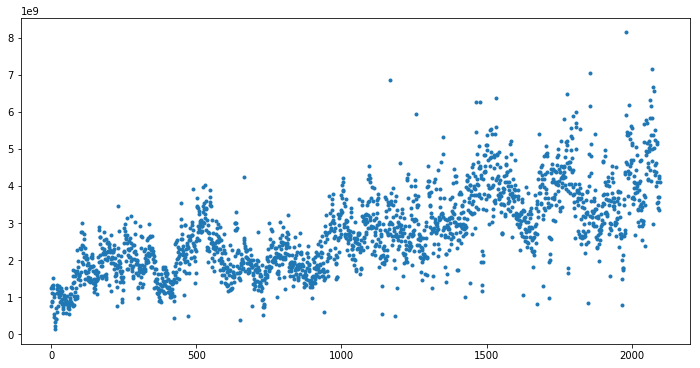

In [22]:
plt.figure(figsize=(12,6))
rowCount = df5.shape[0]
x_range = np.floor(np.arange(0,rowCount)).reshape(rowCount,1)
y_range = np.array(df5[['Traded.Volume']]).reshape(rowCount,1)
plt.plot(x_range, y_range, '.')
plt.show()

## Logaritmik Regresyon olur mu?

**Amaç**: Bir elektromanyetik verici (WiFi Access Point veya Bluetooth Beacon) tarafından yayınlanan sinyallerin sadece şiddet değerleri okunabiliyor. Ancak bize bu okuma noktasında bu vericilere olan uzaklık tahminleri gerekiyor.

**Problem**: Bir elektromanyetik verici tarafından yayınlanan sinyallerin okunduğu uzaklık (metre) ile okunma noktasındaki paketlerin şiddet değerleri (dB) arasında bir bağıntı kurulabilir mi?

**Yapay Öğrenme Hattı**

- Veri toplama (Sinyalleri yakalama ve uzaklık ölçme)
- Verileri inceleme ve uzman görüşü (Attenuation model)
- Verileri temizleme (Kayan penceredeki en yüksek değerler)
- Verileri modelleme (Regresyon)
- Canlıya alma

[[-57.789]
 [ -6.198]]
-60 dB okunursa: 1.4285754348699427 m uzaklık tahmini yapılabilir.


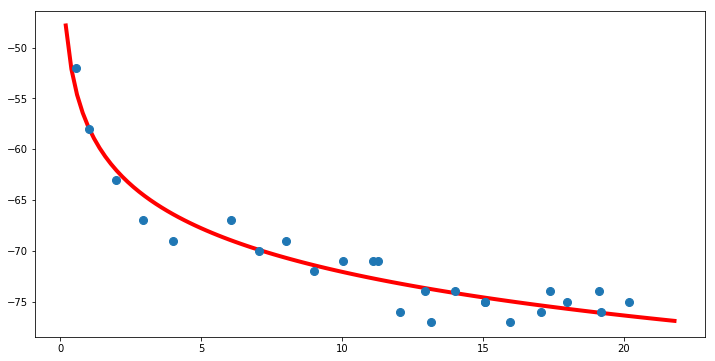

In [23]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([
    [.58, -52],
    [1.02, -58],
    [2.0, -63],
    [2.94, -67],
    [4.02, -69],
    [6.07, -67],
    [7.05, -70],
    [8.00, -69],
    [9.0 , -72],
    [10.05, -71],
    [11.09, -71],
    [12.05, -76],
    [11.29, -71],
    [12.95, -74],
    [14.01, -74],
    [15.08, -75],
    [13.15, -77],
    [15.08, -75],
    [15.96, -77],
    [17.08, -76],
    [17.98, -75],
    [17.39, -74],
    [19.13, -74],
    [20.20, -75],
    [19.20, -76]
])

N = data.shape[0]

# prepare X and y matrices
X = np.concatenate((np.ones((N,1)), np.log(data[:,:1])),axis=1) #
y = data[:,1:2]

# find line coefficients 
b = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)),X.T),y)
print(b)

xlimits = [.2, 22]
linex = np.arange(xlimits[0], xlimits[1],.2)

liney = b[1]* np.log(linex) + b[0]

fig = plt.figure(figsize=(12,6))
plt.plot(linex, liney,'r',linewidth=4)
plt.plot(data[:,0], data[:,1],'o',markersize=8)
print("-60 dB okunursa:", np.exp((-60-b[0])/b[1])[0], "m uzaklık tahmini yapılabilir.")

plt.show()

## Lojistik Regresyon

Lojistik fonksiyonu:

$ g(x) = \frac{1}{1+\exp(\sum_{i=0}^n b_i x_i)} $

### Tek boyutlu

![logistic_curve.jpg](figures/logistic_curve.jpg)

### Çok boyutlu

![logistic_curve3d.png](figures/logistic_curve3d.png)

## Diğer problemler

### En küçük kareler yöntemini kullanabilmek için katsayılar toplam durumunda olmalıdır. Bunu sağladığımız durumlarda yöntem her zaman kullanılabilir. 
- Problemin lineer olmadığı ama katsayıları toplam durumunda olduğu durumlara doğrusallaştırılabilir lineer olmayan problemler denir.

- Bunun dışındaki durumlara, yani katsayıların çarpım durumunda olduğu durumlara ise nonlineer problemler denir.

$y = b_0 + b_1 \log(b_2 x)$ 

$y = b_0 + b_1 \sin(b_2 x)$

$y = b_0 + \frac{b_1 x_1}{b_2 x_2 + b_3 x_3} $

- Bu gibi problemleri çözmek için başka en iyileme yöntemlerini uygulamak gerekir. Genellikle iteratif yöntemlere danışılır.